In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/amazon_sales_2025_cleaned.csv", parse_dates=['Date'])


##### 🧮 KPI 1: Total Revenue

In [2]:
total_revenue = df['Total_Sales_INR'].sum()
total_revenue


np.float64(1118161803.5)

##### 🧮 KPI 2: Total Orders

In [3]:
total_orders = df.shape[0]
total_orders


15000

##### 🧮 KPI 3: Total Units Sold

In [4]:
total_units = df['Quantity'].sum()
total_units


np.int64(44770)

##### 🧮 KPI 4: Average Order Value (AOV)

In [5]:
aov = df['Total_Sales_INR'].mean()
aov


np.float64(74544.12023333333)

##### 🧮 KPI 5: Average Rating

In [6]:
avg_rating = df['Review_Rating'].mean()
avg_rating


np.float64(3.0401333333333334)

##### 🧮 KPI 6: Unique Customers & States

In [24]:
unique_customers = df['Customer_ID'].nunique()
unique_states = df['State'].nunique()

unique_customers, unique_states


(7259, 28)

#### Revenue Trend Over Time (Line Plot)

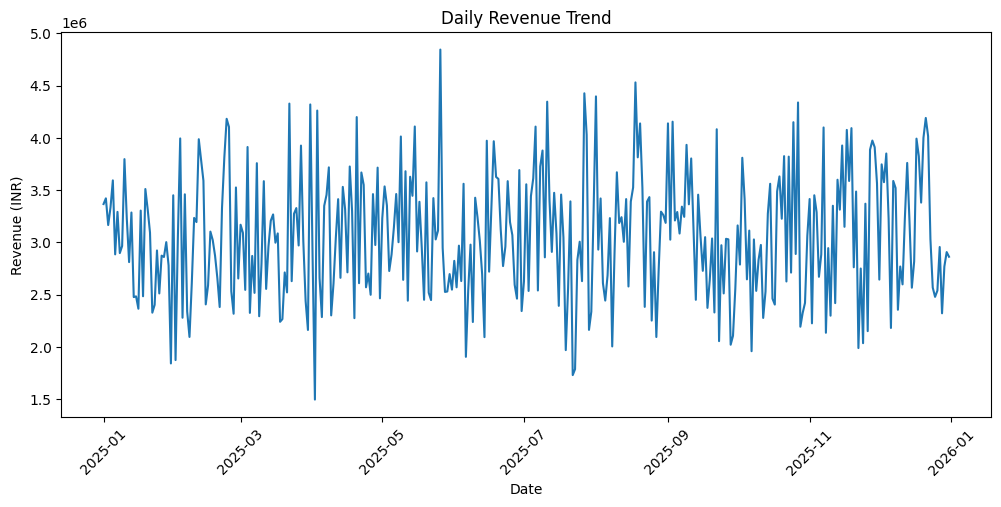

In [7]:
daily_sales = df.groupby('Date')['Total_Sales_INR'].sum()

plt.figure(figsize=(12,5))
sns.lineplot(x=daily_sales.index, y=daily_sales.values)
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue (INR)")
plt.xticks(rotation=45)
plt.show()


#### Monthly Revenue Breakdown

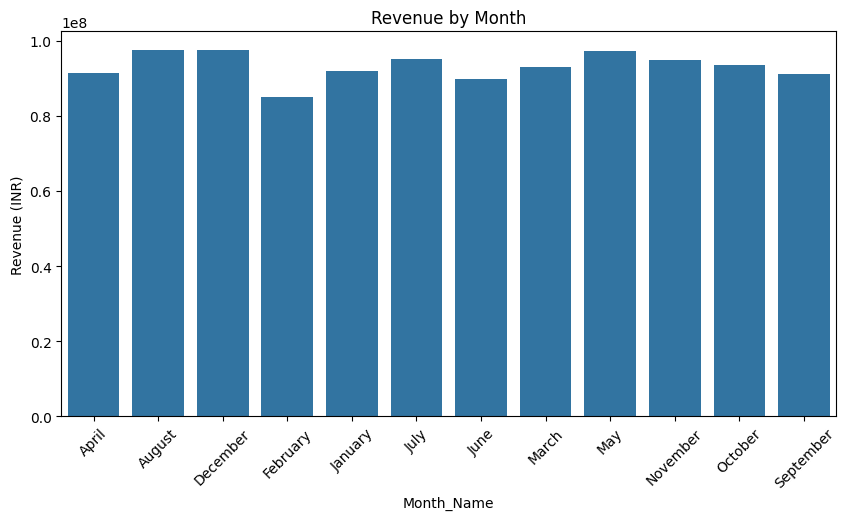

In [8]:
monthly_sales = df.groupby('Month_Name')['Total_Sales_INR'].sum().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title("Revenue by Month")
plt.xticks(rotation=45)
plt.ylabel("Revenue (INR)")
plt.show()


#### Revenue by Product Category

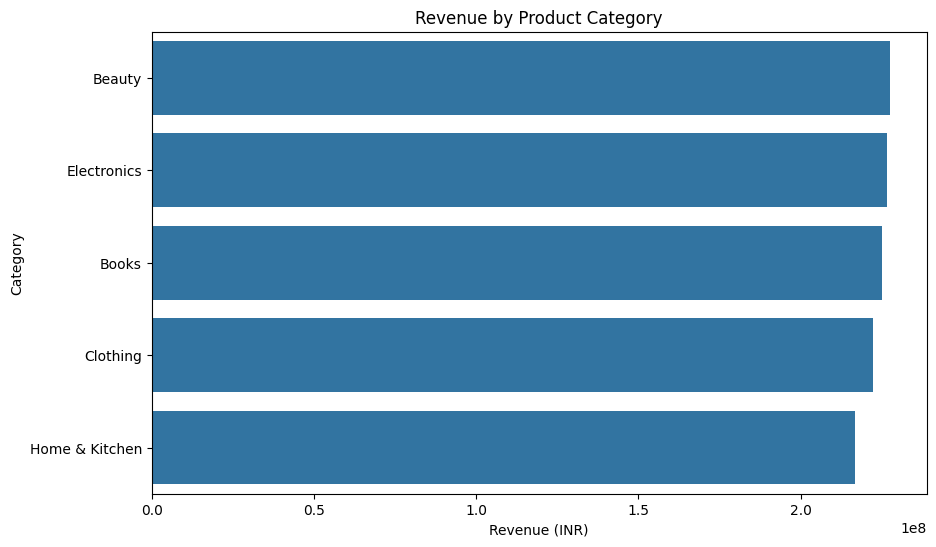

In [9]:
category_sales = df.groupby('Product_Category')['Total_Sales_INR'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=category_sales.values, y=category_sales.index)
plt.title("Revenue by Product Category")
plt.xlabel("Revenue (INR)")
plt.ylabel("Category")
plt.show()


#### Payment Method Distribution

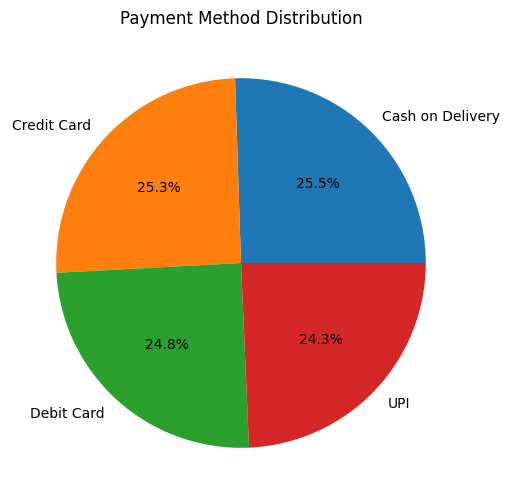

In [10]:
plt.figure(figsize=(6,6))
df['Payment_Method'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()


#### Delivery Status Breakdown

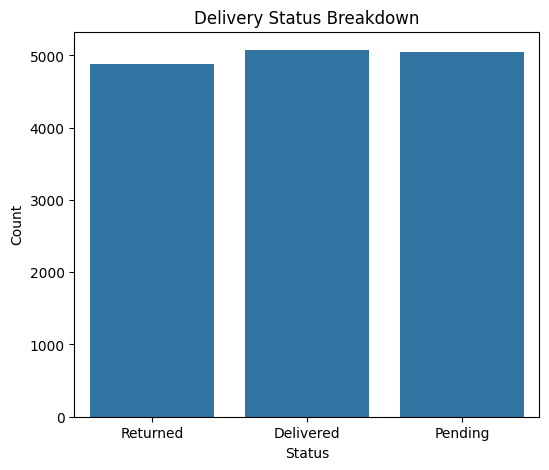

In [11]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='Delivery_Status')
plt.title("Delivery Status Breakdown")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()


#### Rating Distribution

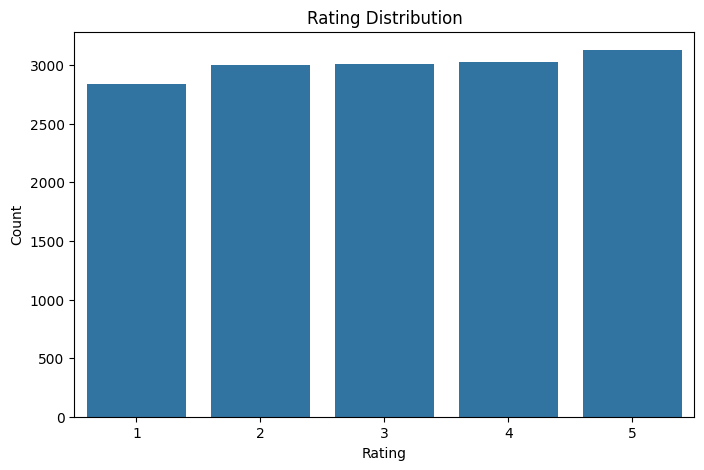

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Review_Rating')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


### Category-Level Deep Dive
#### Revenue share by category

In [13]:
category_share = (
    df.groupby('Product_Category')['Total_Sales_INR']
      .sum()
      .sort_values(ascending=False)
)

category_share


Product_Category
Beauty            2.274896e+08
Electronics       2.265649e+08
Books             2.249992e+08
Clothing          2.224093e+08
Home & Kitchen    2.166987e+08
Name: Total_Sales_INR, dtype: float64

C:\Users\Sam\AppData\Local\Temp\ipykernel_14964\3289461037.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


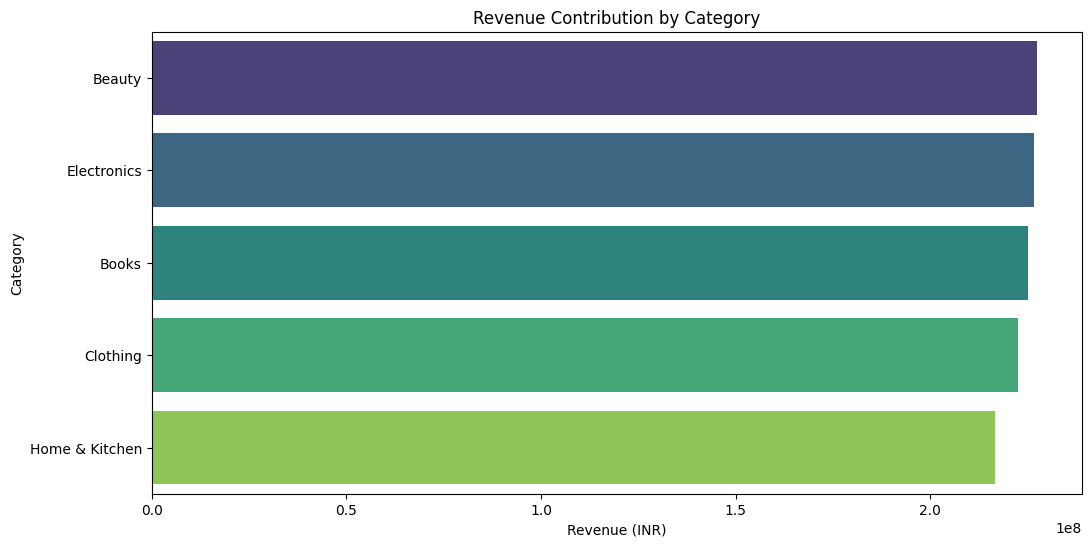

In [14]:
# chart

plt.figure(figsize=(12,6))
sns.barplot(
    x=category_share.values,
    y=category_share.index,
    palette="viridis"
)
plt.title("Revenue Contribution by Category")
plt.xlabel("Revenue (INR)")
plt.ylabel("Category")
plt.show()


### Category vs Quantity Sold

In [15]:
category_units = (
    df.groupby('Product_Category')['Quantity']
      .sum()
      .sort_values(ascending=False)
)

category_units


Product_Category
Beauty            9090
Electronics       9072
Books             8950
Clothing          8924
Home & Kitchen    8734
Name: Quantity, dtype: int64

### Return Analysis
#### A. Overall return rate

In [16]:
return_rate = (
    (df['Delivery_Status'] == 'Returned').mean() * 100
)
return_rate


np.float64(32.54)

#### B. Return rate by category

In [17]:
returns_by_category = (
    df.assign(Returned=df['Delivery_Status'] == 'Returned')
      .groupby('Product_Category')['Returned']
      .mean()
      .sort_values(ascending=False) * 100
)

returns_by_category


Product_Category
Books             33.904448
Electronics       33.135705
Clothing          32.495036
Beauty            31.831832
Home & Kitchen    31.271478
Name: Returned, dtype: float64

C:\Users\Sam\AppData\Local\Temp\ipykernel_14964\2587496039.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


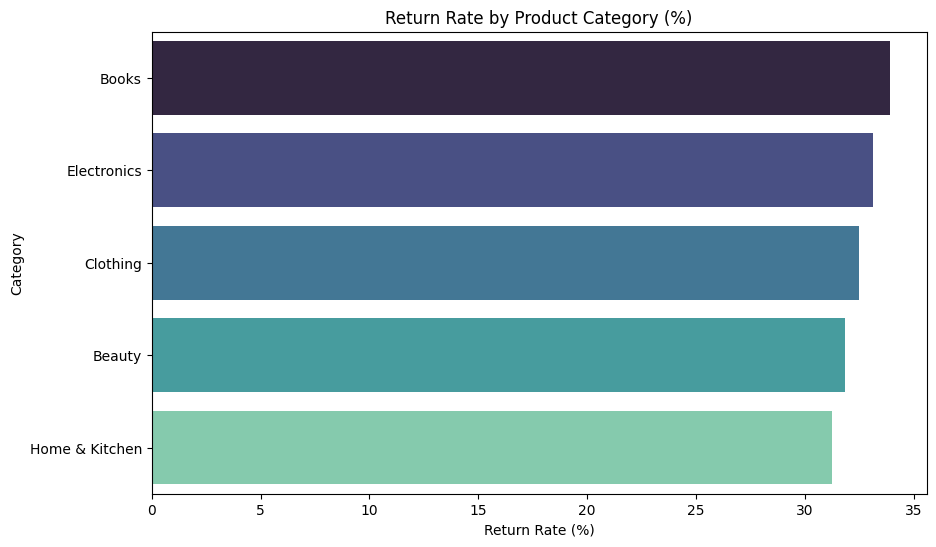

In [18]:
# chart

plt.figure(figsize=(10,6))
sns.barplot(
    x=returns_by_category.values,
    y=returns_by_category.index,
    palette="mako"
)
plt.title("Return Rate by Product Category (%)")
plt.xlabel("Return Rate (%)")
plt.ylabel("Category")
plt.show()


### Payment Method Behavior
#### Payment method → return rate

In [19]:
returns_by_payment = (
    df.assign(Returned=df['Delivery_Status'] == 'Returned')
      .groupby('Payment_Method')['Returned']
      .mean()
      .sort_values(ascending=False) * 100
)

returns_by_payment


Payment_Method
Credit Card         33.342105
Debit Card          32.707271
UPI                 32.117389
Cash on Delivery    31.983277
Name: Returned, dtype: float64

### Ratings Analysis
#### A. Average rating per category

In [20]:
avg_rating_category = (
    df.groupby('Product_Category')['Review_Rating']
      .mean()
      .sort_values(ascending=False)
)

avg_rating_category


Product_Category
Electronics       3.071146
Home & Kitchen    3.064261
Beauty            3.036703
Books             3.031960
Clothing          2.997353
Name: Review_Rating, dtype: float64

#### B. Rating vs Return Behavior

In [21]:
rating_return_corr = (
    df.assign(Returned = df['Delivery_Status'] == 'Returned')
      .groupby('Review_Rating')['Returned']
      .mean() * 100
)

rating_return_corr


Review_Rating
1    32.722790
2    30.687125
3    33.056754
4    32.759762
5    33.439898
Name: Returned, dtype: float64

### State-Level Sales (Geographical Analysis)
#### A. Revenue by state

In [22]:
state_revenue = (
    df.groupby('State')['Total_Sales_INR']
      .sum()
      .sort_values(ascending=False)
)

state_revenue.head(10)


State
Sikkim           43113469.51
Rajasthan        42906175.08
Chhattisgarh     42857545.27
Meghalaya        42773152.96
Tamil Nadu       41967968.99
Uttar Pradesh    41690917.07
Bihar            41669240.44
West Bengal      41195932.45
Tripura          41103376.81
Odisha           40924381.38
Name: Total_Sales_INR, dtype: float64

#### B. Return rate by state

In [23]:
state_returns = (
    df.assign(Returned=df['Delivery_Status'] == 'Returned')
      .groupby('State')['Returned']
      .mean()
      .sort_values(ascending=False) * 100
)

state_returns.head(10)


State
Assam            36.347197
Uttar Pradesh    35.571688
Nagaland         34.311927
West Bengal      34.090909
Bihar            33.879781
Manipur          33.873874
Karnataka        33.766234
Tamil Nadu       33.686067
Punjab           33.586338
Meghalaya        33.452594
Name: Returned, dtype: float64